<a href="https://colab.research.google.com/github/Felixatika/Address-book/blob/master/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4

Assignment 4 is part of Lab 3_ KNN. After you build the KNN model how you can improve your results?

## Improving model performance: 

**17. How can you improve the performance of your knn model? list two ways.**

**18. Apply those 2 different ways of improvements. Discuss and explain your results.**

So, let's start by re-run the code from lab 3 first and at the end you can try to answer the questions 17 and 18 to improve the model.

**Objective: Learn how to apply the K-NN algorithm.**

Routine breast cancer screening allows the disease to be diagnosed and treated prior to it causing noticeable symptoms. The process of early detection involves examining the breast tissue for abnormal lumps or masses. If a lump is found, a fine-needle aspiration biopsy is performed, which uses a hollow needle to extract a small sample of cells from the mass. A clinician then examines the cells under a microscope to determine whether the mass is likely to be malignant or benign.

If machine learning could automate the identification of cancerous cells, it would provide considerable benefit to the health system. Automated processes are likely to improve the efficiency of the detection process, allowing physicians to spend less time diagnosing and more time treating the disease. An automated screening system might also provide greater detection accuracy by removing the inherently subjective human component from the process.

We will investigate the utility of machine learning for detecting cancer by applying the k-NN algorithm to measurements of biopsied cells from women with abnormal breast masses.

# I. Collecting data

We will utilize the Wisconsin Breast Cancer Diagnostic dataset from the UCI Machine Learning Repository.

This data was donated by researchers of the University of Wisconsin and includes the measurements from digitized images of fine-needle aspirate of a breast mass. The values represent the characteristics of the cell nuclei present in the digital image.

# II. Exploring and preparing the data

## A. Exploring the data

Let’s explore the data and see whether we can shine some light on the relationships.

In doing so, we will prepare the data for use with the k-NN learning method.

**1. Import and read the csv data file.**

**2. Examine the structure of the data frame.**

In [ ]:
import pandas as pd
#1.
df = pd.read_csv("wisc_bc_data.csv")
print(df.head())
#2.
df.info()

         id diagnosis  ...  symmetry_worst  dimension_worst
0  87139402         B  ...          0.2827          0.06771
1   8910251         B  ...          0.2940          0.07587
2    905520         B  ...          0.2998          0.07881
3    868871         B  ...          0.2102          0.06784
4   9012568         B  ...          0.2487          0.06766

[5 rows x 32 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-

We can see that the data is structured with 569 examples and 32 features.

**3. How to drop the id feature from the analysis? Why to remove it?**

The first variable is an integer variable named id. 

As this is simply a unique identifier (ID) for each patient in the data, it does not provide useful information, and we will need to exclude it from the model.

In [ ]:
df = df.drop(['id'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    object 
 1   radius_mean        569 non-null    float64
 2   texture_mean       569 non-null    float64
 3   perimeter_mean     569 non-null    float64
 4   area_mean          569 non-null    float64
 5   smoothness_mean    569 non-null    float64
 6   compactness_mean   569 non-null    float64
 7   concavity_mean     569 non-null    float64
 8   points_mean        569 non-null    float64
 9   symmetry_mean      569 non-null    float64
 10  dimension_mean     569 non-null    float64
 11  radius_se          569 non-null    float64
 12  texture_se         569 non-null    float64
 13  perimeter_se       569 non-null    float64
 14  area_se            569 non-null    float64
 15  smoothness_se      569 non-null    float64
 16  compactness_se     569 non

**4. Find the target variable. How many levels this variable have?**

The next variable in the info() results, diagnosis, is of particular interest as it is the outcome we hope to predict. 

This feature indicates whether the observation is from a benign or malignant mass.

In [ ]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

The value_counts() output indicates that 357 masses are benign “B” while 212 are malignant “M”.

**5. Find the summary of the following 3 features: radius_mean, area_mean, and the smoothness_mean.**

In [ ]:
df[["radius_mean", "area_mean", "smoothness_mean"]].describe()

,radius_mean,area_mean,smoothness_mean
count,569.000000,569.000000,569.000000
mean,14.127292,654.889104,0.096360
std,3.524049,351.914129,0.014064
min,6.981000,143.500000,0.052630
25%,11.700000,420.300000,0.086370
50%,13.370000,551.100000,0.095870
75%,15.780000,782.700000,0.105300
max,28.110000,2501.000000,0.163400


**6. Looking at the features side-by-side, do you notice anything problematic about the values?**

Since smoothness ranges from 0.05 to 0.16 and area ranges from 143.5 to 2501.0, the impact of area is going to be much larger than the smoothness in the distance calculation. 

This could potentially cause problems for our classifier, so we need to apply normalization to rescale the features to a standard range of values.

## B. Transformation - normalizing numeric data

Let’s normalize just the numeric variable.

To normalize these features, we need to create a normalize() function in Python. 

This function takes a list x of numeric values, and for each value in x, subtracts the minimum value in x and divides by the range of values in x. Finally, the resulting list is returned.

**7. Create the normalize() function and check if it work correctly using a list of numbers before applying this function to the whole data.**

In [ ]:
# create normalization function
# col is a column in a dataframe
def normalize(col):   
    return (col-col.min())/(col.max()-col.min())

# test normalization function - result should be identical
a = pd.DataFrame({"x":[1,2,3,4,5,6]})
normalize(a)

,x
0,0.0
1,0.2
2,0.4
3,0.6
4,0.8
5,1.0


**8. Apply the normalize() function to the whole data. Write the code of this process and rename the new data df1.**

In [ ]:
df1 = df.drop(['diagnosis'], axis=1)
df1.info()
df1 = normalize(df1)
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   radius_mean        569 non-null    float64
 1   texture_mean       569 non-null    float64
 2   perimeter_mean     569 non-null    float64
 3   area_mean          569 non-null    float64
 4   smoothness_mean    569 non-null    float64
 5   compactness_mean   569 non-null    float64
 6   concavity_mean     569 non-null    float64
 7   points_mean        569 non-null    float64
 8   symmetry_mean      569 non-null    float64
 9   dimension_mean     569 non-null    float64
 10  radius_se          569 non-null    float64
 11  texture_se         569 non-null    float64
 12  perimeter_se       569 non-null    float64
 13  area_se            569 non-null    float64
 14  smoothness_se      569 non-null    float64
 15  compactness_se     569 non-null    float64
 16  concavity_se       569 non

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0.252686,0.090632,0.242278,0.135992,0.452920,0.154684,0.093416,0.183897,0.454040,0.201980,0.045084,0.067495,0.043019,0.019851,0.215250,0.071710,0.042500,0.235082,0.159819,0.046750,0.198150,0.096482,0.182081,0.089437,0.444628,0.096351,0.099201,0.322715,0.248768,0.083104
1,0.171281,0.312479,0.176145,0.086066,0.399476,0.292375,0.149649,0.131312,0.435354,0.314869,0.122759,0.184936,0.125948,0.037912,0.195703,0.252035,0.084697,0.258572,0.382141,0.083717,0.140519,0.291045,0.138802,0.058887,0.331044,0.217530,0.153035,0.272371,0.271043,0.136626
2,0.192106,0.240785,0.187478,0.097434,0.497156,0.179928,0.071368,0.123260,0.330303,0.283067,0.030853,0.226927,0.027564,0.012585,0.117109,0.053347,0.026667,0.141750,0.130832,0.045023,0.159374,0.384328,0.147019,0.070340,0.434062,0.117307,0.085224,0.255361,0.282476,0.155910
3,0.203464,0.124450,0.201852,0.102354,0.575697,0.289001,0.108599,0.238370,0.359091,0.226622,0.082165,0.217203,0.051548,0.036474,0.324880,0.245802,0.055227,0.372230,0.111414,0.088001,0.141942,0.099947,0.130086,0.061148,0.432741,0.150294,0.069241,0.295911,0.105855,0.083956
4,0.388518,0.118363,0.372193,0.241060,0.243748,0.153242,0.079499,0.132058,0.333838,0.115417,0.024190,0.011559,0.027376,0.020392,0.112146,0.094617,0.039167,0.173423,0.120842,0.030133,0.294201,0.098881,0.269386,0.155795,0.273592,0.142048,0.108786,0.281031,0.181747,0.082776


**9. How to check if the normalization is working?**

In [ ]:
df1[["radius_mean", "area_mean", "smoothness_mean"]].describe()

,radius_mean,area_mean,smoothness_mean
count,569.000000,569.000000,569.000000
mean,0.338222,0.216920,0.394785
std,0.166787,0.149274,0.126967
min,0.000000,0.000000,0.000000
25%,0.223342,0.117413,0.304595
50%,0.302381,0.172895,0.390358
75%,0.416442,0.271135,0.475490
max,1.000000,1.000000,1.000000


## C. Data preparation - creating training and test datasets

In the absence of new unlabeled data, we can simulate the scenario of testing new unlabeled data by dividing our data into two portions: 

- a training dataset that will be used to build the k-NN model and 
- a test dataset that will be used to estimate the predictive accuracy of the model. 

We will use the first 469 records for the training dataset and the remaining 100 to simulate new patients.

**10. Create those training and test sets named data_X_train and data_X_test.**

In [ ]:
# create training and test data
data_X_train = df1.iloc[0:469, ]
data_X_train.info()
data_X_test = df1.iloc[469:569, ]
data_X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   radius_mean        469 non-null    float64
 1   texture_mean       469 non-null    float64
 2   perimeter_mean     469 non-null    float64
 3   area_mean          469 non-null    float64
 4   smoothness_mean    469 non-null    float64
 5   compactness_mean   469 non-null    float64
 6   concavity_mean     469 non-null    float64
 7   points_mean        469 non-null    float64
 8   symmetry_mean      469 non-null    float64
 9   dimension_mean     469 non-null    float64
 10  radius_se          469 non-null    float64
 11  texture_se         469 non-null    float64
 12  perimeter_se       469 non-null    float64
 13  area_se            469 non-null    float64
 14  smoothness_se      469 non-null    float64
 15  compactness_se     469 non-null    float64
 16  concavity_se       469 non

**11. Can you store its correspondents target variable in 2 separate columns? Name them data_y_train and data_y_test.**

In [ ]:
# create labels for training and test data

data_y_train = df.iloc[0:469, 0]
data_y_train.head()
data_y_test = df.iloc[469:569,0]
data_y_test.head()

469    B
470    B
471    B
472    B
473    M
Name: diagnosis, dtype: object

# III. Training a model on the data

Equipped with our training data and labels column, we are now ready to classify our unknown records.

For the k-NN algorithm, the training phase actually involves no model building; the process of training a lazy learner like k-NN simply involves storing the input data in a structured format.

**12. To classify our test instances, use a k-NN implementation from the scikitlearn library, which provides a set of powerful python functions for classification.**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(data_X_train, data_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
data_y_pred = classifier.predict(data_X_test)
data_y_pred

array(['B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M'], dtype=object)

# IV. Evaluating model performance

The next step of the process is to evaluate how well the predicted classes in the df_ test_pred list matches up with the known values in the df_test_labels list.

**13. How to compare data_y_pred  to data_y_test? Tip: Those are 2 categorical variables, how to study the relationship of two categorical variables?**

In [ ]:
contingency_table = pd.crosstab(data_y_test,data_y_pred)
contingency_table

col_0,B,M
diagnosis,,
B,61,0
M,2,37


In [ ]:
# or we can use these functions from Scikit Learn
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(data_y_test,data_y_pred))
print(classification_report(data_y_test,data_y_pred))

[[61  0]
 [ 2 37]]
              precision    recall  f1-score   support

           B       0.97      1.00      0.98        61
           M       1.00      0.95      0.97        39

    accuracy                           0.98       100
   macro avg       0.98      0.97      0.98       100
weighted avg       0.98      0.98      0.98       100



**14. What is accuracy of this model?**

A total of 2 out of 100, or 2 percent of masses were incorrectly classified by the k-NN approach that means an accuracy of 98 percent.

**15. Discuss and explain the results of using this model by looking into the false negative and the false positive numbers.**

The cell percentages in the table indicate the proportion of values that fall into four categories: the true negative, the true positive, the false negative and the false positive.

The top-left cell indicates the **true negative** results. These 61 of 100 values are cases where the mass was benign and the k-NN algorithm correctly identified it as such.

The bottom-right cell indicates the **true positive** results, where the classifier and the clinically determined label agree that the mass is malignant. A total of 37 of 100 predictions were true positives.

The cells falling on the other diagonal contain counts of examples where the k-NN approach disagreed with the true label.

The two examples in the lower-left cell are **false negative** results; in this case, the predicted value was benign, but the tumor was actually malignant. Errors in this direction could be extremely costly as they might lead a patient to believe that she is cancer-free, but in reality, the disease may continue to spread.

The top-right cell would contain the **false positive** results, if there were any. These values occur when the model classifies a mass as malignant, but in reality, it was benign. Although such errors are less dangerous than a false negative result, they should also be avoided as they could lead to additional financial burden on the health care system or additional stress for the patient as additional tests or treatment may have to be provided.

**16. Is it possible to improve the performance of this model?**

While 98 percent accuracy seems impressive for a few lines of code, we might try another iteration of the model to see whether we can improve the performance and reduce the number of values that have been incorrectly classified, particularly because the errors were dangerous false negatives.


# V. Improving model performance: Assignment 4

**17. How can you improve the performance of your knn model? list two ways.**


* Hyper parameter tuning; using a range of k nearest neighbors and metric distances that are the; manhattan, euclidean and minkowski.
* Dimensionality reduction.

**18. Apply those 2 different ways of improvements. Discuss and explain your results.**

### Hyper parameter tuning using the Grid Search CV

In [ ]:
#Defining the hyper parameters for the Knearest Neighbors Classifier
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p = [1,2]
metric = ['manhattan', 'euclidean', 'minkowski']
#Creating a dictionary with the hyperparameters
hyperparameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p=p,metric = metric)

In [ ]:
#I used GridSearch to look for the best parameters
from sklearn.model_selection import GridSearchCV

classifier = KNeighborsClassifier()

clf = GridSearchCV(classifier, hyperparameters,cv=10)

In [ ]:
#Reduction of columns using the Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(data_X_train, data_y_train)
X_test = lda.transform(data_X_test)

In [ ]:
#Fitting the model
clf.fit(X_train,data_y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'metric': ['manhattan', 'euclidean', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1,

In [ ]:
#Printing out the best parameters for the model.
clf.best_params_

{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 5, 'p': 1}

In [ ]:
#Fitting the model using the best parameters in the model.
classifier = KNeighborsClassifier(leaf_size=1,n_neighbors=5,p=1,metric='manhattan')
classifier.fit(X_train,data_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')

In [ ]:
#Predicting values using our test set
y_predict = classifier.predict(X_test)
#Printing out the metrics for assessing the model's perfromance
print(confusion_matrix(data_y_test,y_predict))
print(classification_report(data_y_test,y_predict))

[[58  3]
 [ 0 39]]
              precision    recall  f1-score   support

           B       1.00      0.95      0.97        61
           M       0.93      1.00      0.96        39

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



### Did the model's performance improve?

Though, the model had a reduced accuracy it was able to omit the false positives. There was a 3% error on the false negatives which we will reduce the columns to see whether our model's performance will increase.

### Choosing the most important features to input in our model using the Random Forest Algorithm.

In [ ]:
#Fitting our data in a Random Forest model.
from sklearn.ensemble import RandomForestClassifier 

forest = RandomForestClassifier(n_estimators=100,random_state=42,min_samples_split=20,max_depth=5)
forest.fit(data_X_train,data_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#Predicting using our test values.
y_predict = forest.predict(data_X_test)

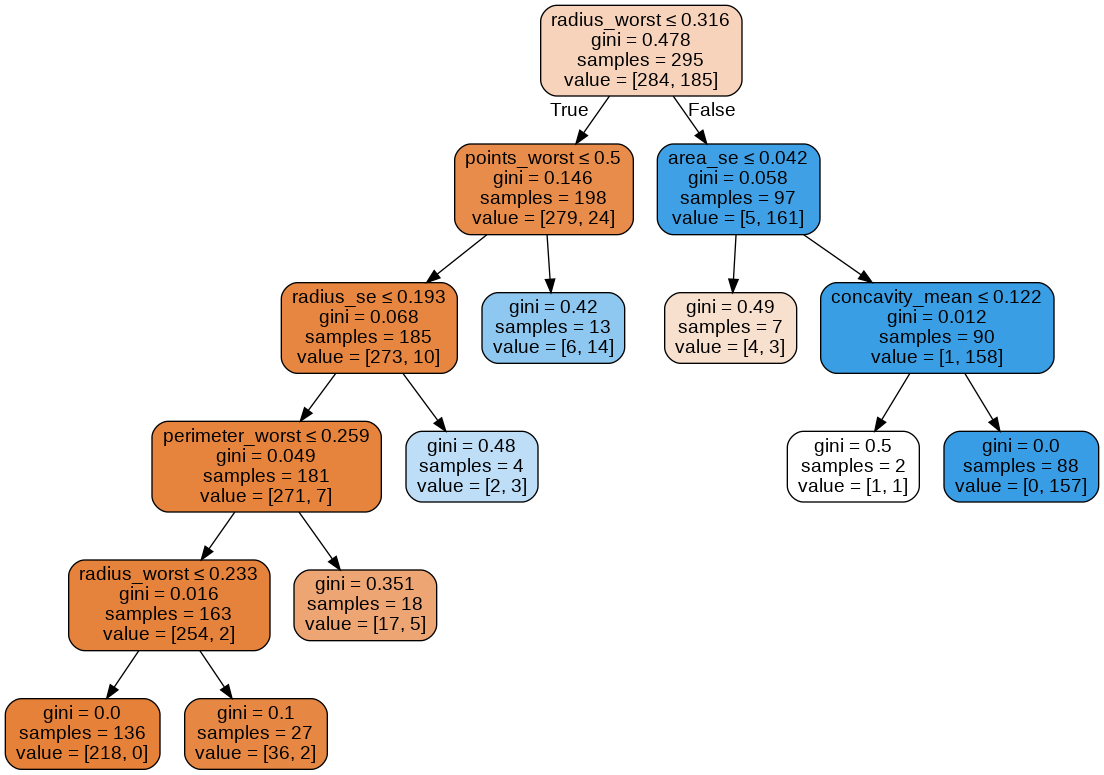

In [ ]:
#Visualizing the Decision Tree of our 50th tree in our forest.
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
StringIO().write(str((1,2)))
from IPython.display import Image 
import pydotplus

tree = forest.estimators_[3]

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = df1.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('BreastCancer.png') 
Image(graph.create_png())

In [ ]:
#Picking the top most important features
important_feat = pd.DataFrame({'feature': df1.columns, 'importance': forest.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False).head(10)
important_feat

,importance
feature,
points_worst,0.138314
area_worst,0.132895
points_mean,0.119176
perimeter_worst,0.095194
radius_worst,0.088658
concavity_mean,0.080543
perimeter_mean,0.075221
radius_mean,0.053031
area_se,0.052094


In [ ]:
features = df1[['points_worst','area_worst',	'points_mean','perimeter_worst','radius_worst','concavity_mean','perimeter_mean','radius_mean','area_se','concavity_worst']]

In [ ]:
# create training and test data
data_X_train = features.iloc[0:469, ]
data_X_test = features.iloc[469:569, ]

In [ ]:
# create labels for training and test data

data_y_train = df.iloc[0:469, 0]
data_y_test = df.iloc[469:569,0]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(data_X_train, data_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
data_y_pred = classifier.predict(data_X_test)

In [ ]:
# or we can use these functions from Scikit Learn
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(data_y_test,data_y_pred))
print(classification_report(data_y_test,data_y_pred))

[[59  2]
 [ 5 34]]
              precision    recall  f1-score   support

           B       0.92      0.97      0.94        61
           M       0.94      0.87      0.91        39

    accuracy                           0.93       100
   macro avg       0.93      0.92      0.93       100
weighted avg       0.93      0.93      0.93       100



In [ ]:
#I used GridSearch to look for the best parameters
from sklearn.model_selection import GridSearchCV

classifier = KNeighborsClassifier()

clf = GridSearchCV(classifier, hyperparameters,cv=10)

In [ ]:
#Fitting the model
clf.fit(X_train,data_y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'metric': ['manhattan', 'euclidean', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1,

In [ ]:
#Printing out the best parameters for the model
clf.best_params_

{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 16, 'p': 1}

In [ ]:
#Fitting the model using the best parameters in the model.
classifier = KNeighborsClassifier(leaf_size=1,n_neighbors=16,p=1,metric='manhattan')
classifier.fit(X_train,data_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=1,
                     weights='uniform')

In [ ]:
#Predicting values using our test set
y_predict = classifier.predict(X_test)
#Printing out the metrics for assessing the model's perfromance
print(confusion_matrix(data_y_test,y_predict))
print(classification_report(data_y_test,y_predict))

[[61  0]
 [ 5 34]]
              precision    recall  f1-score   support

           B       0.92      1.00      0.96        61
           M       1.00      0.87      0.93        39

    accuracy                           0.95       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100



The model did not perform better after dimensionality reduction. In this case, I would recommend picking the baseline model or the tuned model. The tuned model has an advantage of no fales negatives hence but with 3 false positives.  